In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

In [93]:
N=100
tab_ra=np.linspace(0,360,N)
tab_dec=np.linspace(-90,90,N)
tab_l=np.linspace(0,360,N)
tab_b=np.linspace(-90,90,N)


In [98]:
P=[]
X=[]
Y=[]
Z=[]


alpha=0.25
Rb=0.8
Rd=2.5
Zd=0.4

D=30/2
Rg=8.5
P.clear()
#for ra in tab_ra:
#for dec in tab_dec:
for l in tab_l:
    for b in tab_b:
        #b=np.arcsin(np.cos(dec)*np.cos(27.4)*np.cos(ra-192.25)+np.sin(dec)*np.sin(27.4))
        #l=np.arctan((np.sin(dec)-np.sin(b)*np.sin(27.4))/(np.cos(dec)*np.cos(27.4)*np.sin(ra-192.25)))+33
        #b=np.arcsin(np.sin(dec)*np.cos(23.4)-np.cos(dec)*np.sin(23.4)*np.sin(ra))
        #l=np.arctan((np.sin(dec)*np.sin(23.4)+np.cos(dec)*np.cos(23.4)*np.sin(ra))/(np.cos(ra)*np.cos(dec)))
        #coord=SkyCoord(l, b,frame="galactic", unit=(u.deg, u.deg))
        #coord1 = coord.cartesian
        l=l*(np.pi/180)
        b=b*(np.pi/180)
        
        DL=D*np.arccos(np.cos(b)*np.cos(l))
        x=DL*np.cos(b)*np.cos(l)
        y=DL*np.cos(b)*np.sin(l)
        z=DL*np.sin(b)
        
        xgc = x-Rg
        ygc = y
        zgc = z
        
        xec = -0.05487556043*xgc + 0.4941094278*ygc - 0.86766614920*zgc
        yec = -0.99382137890*xgc - 0.1109907351*ygc - 0.00035159077*zgc
        zec = -0.09647662818*xgc + 0.8622858751*ygc + 0.49714719180*zgc
        
        
        #DL = sqrt(xec*xec + yec*yec + zec*zec);
        
        r_sq=xec**2+yec**2+zec**2
        u_sq=xec**2+yec**2
        P.append(
            (alpha*np.exp(-r_sq/Rb**2)+(1-alpha)*np.exp(-np.sqrt(u_sq)/Rd)*(1/np.cosh(zec/Zd))**2))

        

#from sklearn import preprocessing

#transformer = preprocessing.MinMaxScaler().fit(P)
#X_transformed = transformer.transform(P)

#print(P)

In [99]:
P_f=[]
P_norm=[]
P_log=[]
P_norm.clear
P_f.clear
P_log.clear
for i in range(len(P)):
    P_norm.append((P[i]-np.amin(P))/(np.amax(P)-np.amin(P)))
    P_f.append((1-0.1)*P_norm[i]+0.1)
for i in range(len(P_f)):
    P_log.append(np.log(P_f[i]))

In [68]:
P_tot = []
for i in range(N):
    P_tot.append([])

for i in range(N):
    P_tot[i]=P[0+N*i:(i+1)*N]
    


In [100]:
P_tot.clear
P_tot = []

for i in range(N):
    P_tot.append([])


for i in range(N):
    P_tot[i]=P_f[0+N*i:(i+1)*N]

    



In [101]:
print(np.shape(P_tot))
print(P_tot[8])

(100, 100)
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.10000000000000002, 0.10000000000000005, 0.10000000000000026, 0.10000000000000152, 0.10000000000000911, 0.10000000000005509, 0.10000000000033346, 0.10000000000201105, 0.10000000001203334, 0.1000000000711451, 0.10000000041389252, 0.1000000023591547, 0.10000001311685901, 0.10000007081025519, 0.10000036933403693, 0.10000185138184367, 0.10000886759993019, 0.10004032430254967, 0.10017286716390855, 0.10069332287719794, 0.1025811849041461, 0.10885125889971876, 0.12774010939149139, 0.1786523109700538, 0.29791342305223517, 0.5245531906685215, 0.8231397557240745, 1.0, 0.8937402510183089, 0.6296980065833415, 0.40045404414672936, 0.2600651464818068, 0.18527393635988557, 0.14702129133375058, 0.12733251811236374, 0.11691558031421032, 0.11661478510277302, 0.12329437925885489, 0.13033683875438196, 0.13668063504957872, 0.14112513702479626, 0.14266524806976985, 0.14084380552497228, 0.13596301145582562, 0.12902323673549004

In [102]:
evenly_spaced_interval= np.linspace(0, 1, 5)
cm = plt.get_cmap('plasma')
colors = [cm(x) for x in evenly_spaced_interval]
print(colors)

[(0.050383, 0.029803, 0.527975, 1.0), (0.494877, 0.01199, 0.657865, 1.0), (0.798216, 0.280197, 0.469538, 1.0), (0.973416, 0.585761, 0.25154, 1.0), (0.940015, 0.975158, 0.131326, 1.0)]


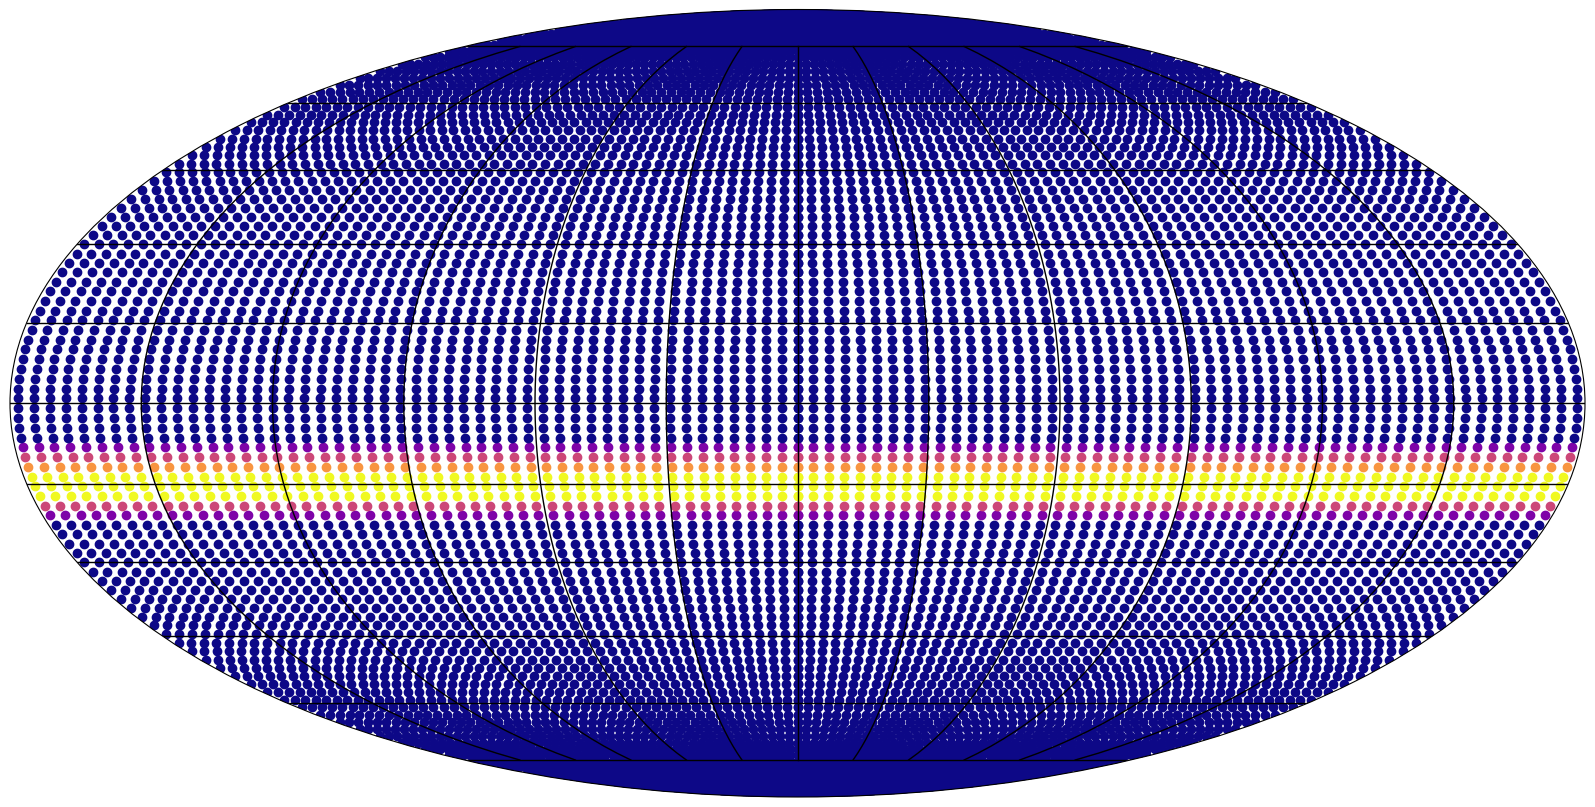

In [103]:
longt=tab_l
lat=tab_b
#color=(P())

############# converting degrees to radians between -pi and pi, and -pi/2 to pi/2 ###########
l=np.zeros(len(longt))
b=np.zeros(len(longt))
for i in range(len(longt)):
    b[i]=lat[i]*np.pi/180.0
    if longt[i]<180:
        l[i]=-(longt[i]*np.pi/180.0)
    else:
        l[i]=2*np.pi-(longt[i]*np.pi/180.0)


######## plotting the figure ##########
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="mollweide")
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.grid(True)
ax.grid(color='black', linestyle='-', linewidth=1)

for i in range(len(tab_l)):
    for j in range(len(tab_b)):
        if (P_tot[i][j]>=0) & (P_tot[i][j]<0.2):
            color=colors[0]
        if (P_tot[i][j]>=0.2) & (P_tot[i][j]<0.4):
            color=colors[1]
        if (P_tot[i][j]>=0.4) & (P_tot[i][j]<0.6):
            color=colors[2]
        if (P_tot[i][j]>=0.6) & (P_tot[i][j]<0.8):
            color=colors[3]
        if (P_tot[i][j]>=0.8) & (P_tot[i][j]<=1):
            color=colors[4]

        im=ax.scatter(l[i],b[j],color=color)
        
#cbar=fig.colorbar(im,cax=None,shrink=0.7,orientation="horizontal",pad=0.02)
#cbar.set_label(color_label, size=25)
#cbar.ax.tick_params(labelsize=25)
#ax.text(0,-1.5,"(0,-90)",fontsize=25)
#ax.text(0,1.4,"(0,90)",fontsize=25)
#ax.text(-np.pi/2.0,0,"(90,0)",fontsize=25)
#ax.text(np.pi/2.0,0,"(270,0)",fontsize=25)
#ax.text(0,0,"(0,0)",fontsize=25)
plt.tight_layout(pad=0.9)
plt.show()




In [27]:
for i in range(len(tab_l)):
    for j in range(len(tab_b)):
        if (P_tot[i][j]>=-2.5) & (P_tot[i][j]<-2.25):
            color=colors[0]
        if (P_tot[i][j]>=-2.25) & (P_tot[i][j]<-2):
            color=colors[1]
        if (P_tot[i][j]>=-2) & (P_tot[i][j]<-1.5):
            color=colors[2]
        if (P_tot[i][j]>=1.5) & (P_tot[i][j]<-1):
            color=colors[3]
        if (P_tot[i][j]>=-1) & (P_tot[i][j]<=0):
            color=colors[4]


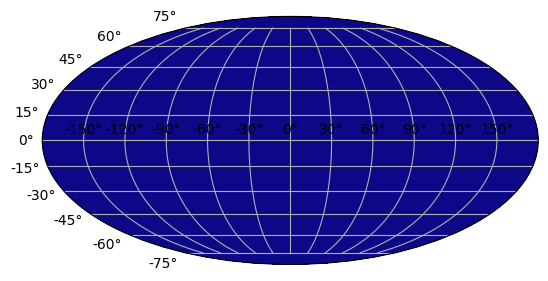

In [114]:
import matplotlib
from astropy.coordinates import SkyCoord
coords = SkyCoord(l, b, unit='deg', frame="galactic")

plt.figure()
plt.subplot(111, projection='mollweide')

for i in range(len(l)):
    for j in range(len(b)):
        plt.scatter(l[i],b[j],c=P_tot[i][j], cmap='plasma'), 
            #norm=matplotlib.colors.LogNorm(vmax=np.nanmax(P_tot)))


plt.grid()
plt.show()

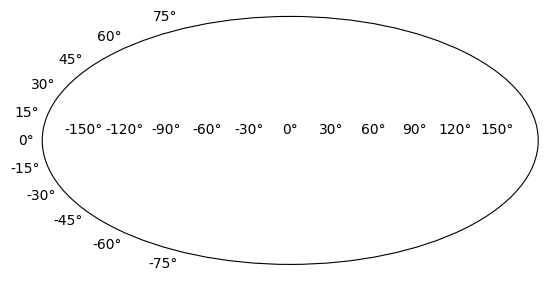

In [110]:
L,B = np.meshgrid(tab_l, tab_b)


plt.figure()
plt.subplot(111, projection='mollweide')
plot = ax.pcolor(tab_l,tab_b,P_tot,vmin=np.abs(P_tot).min(), vmax=np.abs(P_tot).max())
cb = fig.colorbar(plot, ax=ax)